In [1]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd

Mounted at /content/gdrive
/content


# Reporte final de "Los salarios"
## Inteligencia Artificial Avanzada para la ciencia de datos (grupo 101)
### Diego Solis Higuera
### A00827847
### 18 de septiembre de 2022

In [2]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/SEMESTRE_7/Modulo1/Salarios"
!ls

/content/gdrive/MyDrive/Colab Notebooks/SEMESTRE_7/Modulo1/Salarios
ds_salaries.csv  Evidencia1.ipynb


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pandas.plotting import scatter_matrix
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import *
import warnings
warnings.filterwarnings("ignore")

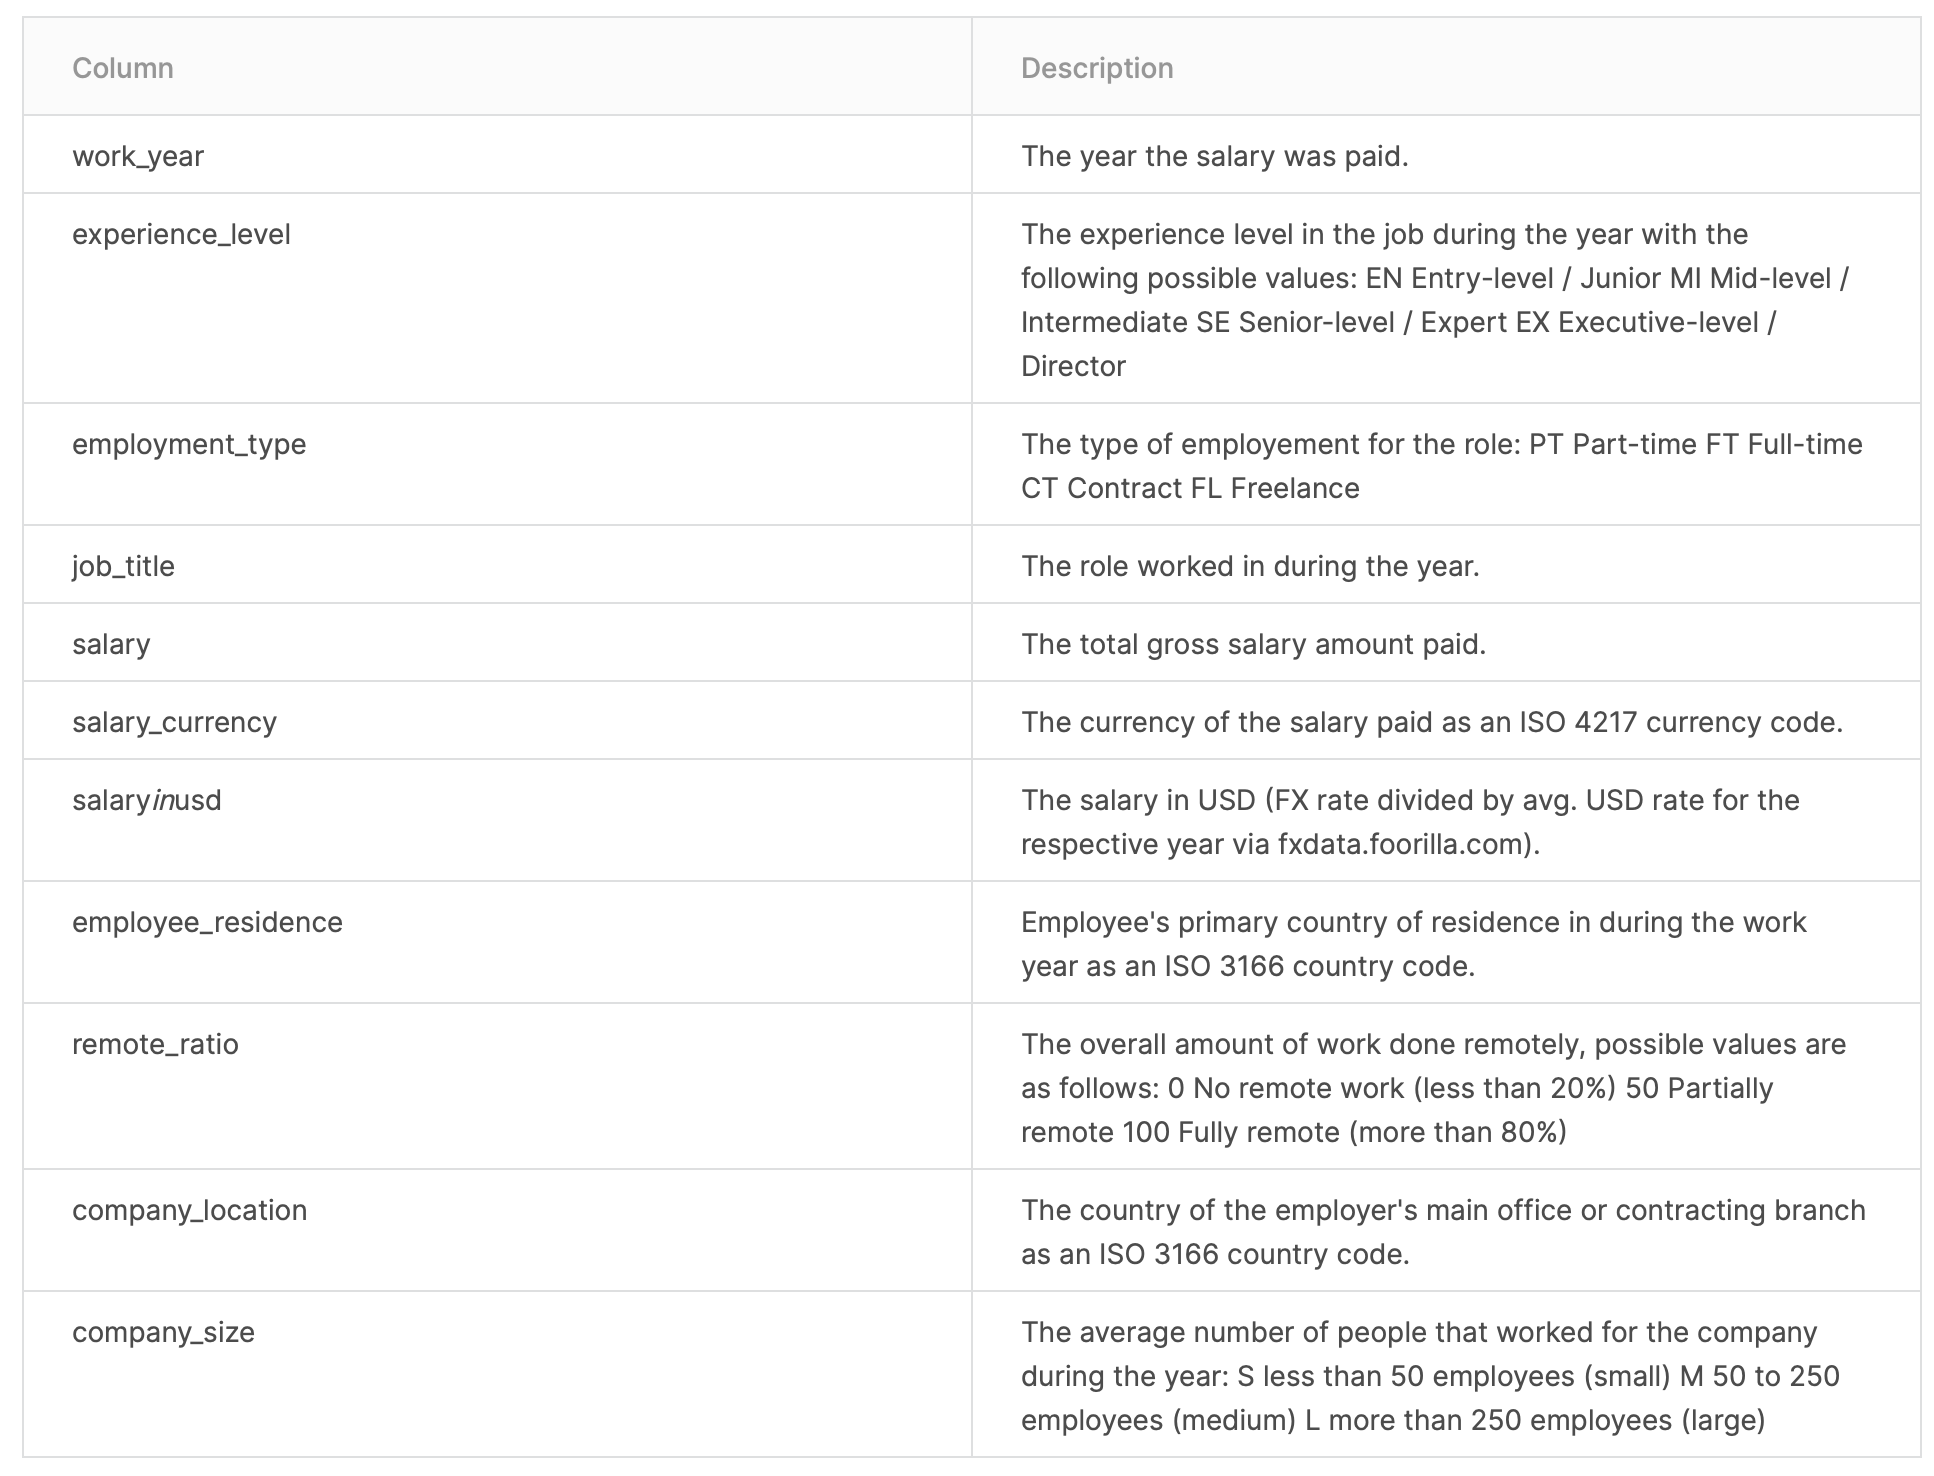

In [4]:
df = pd.read_csv('ds_salaries.csv')

In [5]:
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True)
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Exploración de variables 

## Identificación de cantidad de datos y variables

In [6]:
df.isna().sum()

id                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.shape

(607, 12)

In [8]:
df.dtypes

id                     int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

# Exploración de la base de datos

## Medidas estadísticas

### Variables cuantitativas

#### Datos estadísticos generales

In [39]:
cuantitativas = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
df.loc[:, df.columns!='id'].describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


#### Moda de variables cuantitativas

In [10]:
#df['salary'].mode()
for i in (df.loc[:, df.columns.isin(cuantitativas)].columns):
  print('{} \n {} \n ~~~~~~~ \n'.format(i, df[i].mode()))

work_year 
 0    2022
dtype: int64 
 ~~~~~~~ 

salary 
 0     80000
1    100000
dtype: int64 
 ~~~~~~~ 

salary_in_usd 
 0    100000
dtype: int64 
 ~~~~~~~ 

remote_ratio 
 0    100
dtype: int64 
 ~~~~~~~ 



#### Varianza

In [11]:
df.loc[:, df.columns.isin(cuantitativas)].var()

work_year        4.790481e-01
salary           2.385040e+12
salary_in_usd    5.034933e+09
remote_ratio     1.657233e+03
dtype: float64

### Variables cualitativas

In [12]:
cualitativas = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

## ¿Cuál es el salario al que pueda aspirar un analista de datos?

Para poder responder esta pregunta, primero es importante mencionar que estaremos utilizando salario en usd, ya que este permite estandarizar este aspecto de nuestra base de datos, dándonos un resultado homogéneo. Dicho esto, podemos agrupar por título de trabajo y obtener las medias, lo que nos despliega una tabla con todos los nombres. Ahí podemos determinar que un **Analista de Datos** puede aspirar a un salario promedio de **92,893.06 USD** El salario más bajo es de **2,859.00 USD**, mientras que el más alto es de **600,000 USD**. Para hacer este análisis, fue necesario eliminar los datos atípicos, los cuales puede llegar a impactar de manera significativa los valores reales.

In [42]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

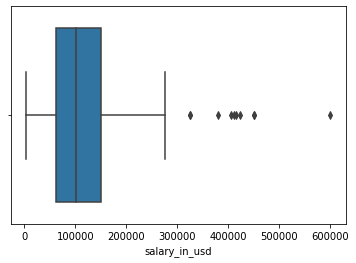

In [45]:
sns.boxplot(data=df, x=df['salary_in_usd'],orient="v")

In [46]:
for x in ['salary_in_usd']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
df.dropna()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000.0,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000.0,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000.0,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000.0,US,100,US,M


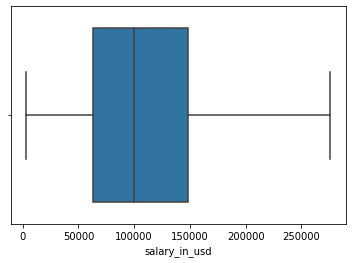

In [47]:
sns.boxplot(data=df, x=df['salary_in_usd'],orient="v")

(array([ 54.,  75., 102., 106.,  87.,  76.,  41.,  36.,  12.,   8.]),
 array([  2859. ,  30173.1,  57487.2,  84801.3, 112115.4, 139429.5,
        166743.6, 194057.7, 221371.8, 248685.9, 276000. ]),
 <a list of 10 Patch objects>)

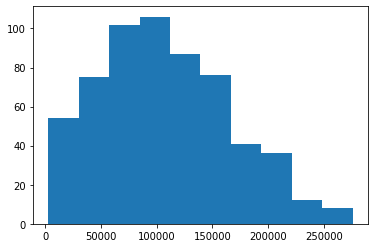

In [48]:
plt.hist(df['salary_in_usd'], histtype ='bar')

In [49]:
df.groupby('job_title').mean()

,id,work_year,salary,salary_in_usd,remote_ratio
job_title,,,,,
3D Computer Vision Researcher,77.000000,2021.000000,4.000000e+05,5409.000000,50.000000
AI Scientist,254.142857,2021.142857,2.905714e+05,66135.571429,78.571429
Analytics Engineer,458.250000,2022.000000,1.750000e+05,175000.000000,50.000000
Applied Data Scientist,351.600000,2021.600000,1.724000e+05,124568.750000,70.000000
Applied Machine Learning Scientist,321.000000,2021.500000,1.413500e+05,48425.000000,87.500000
BI Data Analyst,106.333333,2020.833333,1.902045e+06,74755.166667,66.666667
Big Data Architect,255.000000,2021.000000,1.250000e+05,99703.000000,50.000000
Big Data Engineer,123.125000,2020.625000,4.550000e+05,51974.000000,50.000000
Business Data Analyst,256.800000,2021.000000,3.550000e+05,76691.200000,90.000000


# ¿En qué países se ofrecen mejores salarios?

Para responder a esta pregunta, podemos observar primeramente que la mayor parte de nuestro datos provienen de Estados Unidos, lo que puede ser un indicador de que en este país se ofrezcan mejores salarios. Sin embargo, aplicaremos herramientas estadísticas para obtener esta respuesta.

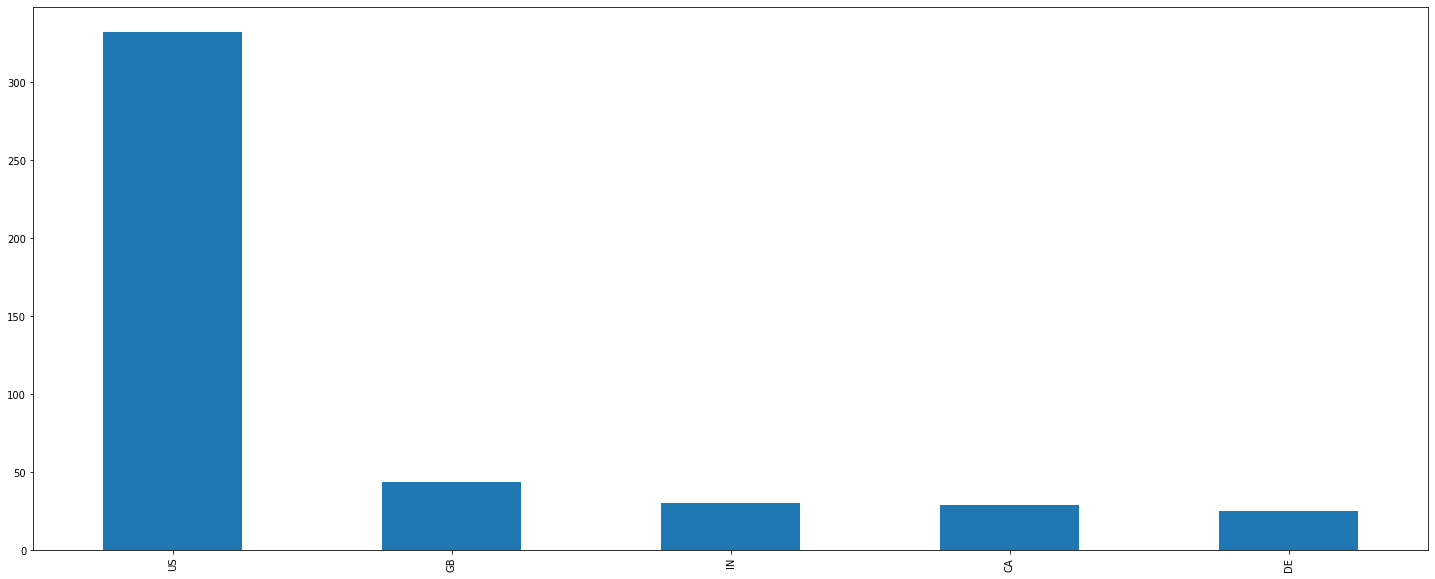

In [13]:
plt.figure(figsize=(25,10))
df['employee_residence'].copy().value_counts().head().plot(kind='bar')
plt.show()

Podemos concluir que los países que mejor pagan son Myanmar, Puerto Rico, Estados Unidos y Nueva Zelanda.

In [38]:
df_countries = df.groupby('employee_residence').mean().copy()

df_countries = df_countries.sort_values(by=['salary_in_usd'], ascending=False)
df_countries.drop(columns=['id', 'work_year', 'salary', 'remote_ratio']).head()

,salary_in_usd
employee_residence,
MY,200000.00000
PR,160000.00000
US,149194.11747
NZ,125000.00000
CH,122346.00000


# ¿Qué tipo de contrato (parcial, tiempo completo, etc) ofrece mejores salarios?

Podemos observar que el tipo de empleo que ofrece mejores contratos es el de **Contract Freelance**, con un sueldo promedio de **126,718.75 USD**.

In [54]:
df_type = df.groupby('employment_type').mean().copy()

df_type = df_type.sort_values(by=['employment_type'], ascending=False)
df_type.drop(columns=['id', 'work_year', 'salary', 'remote_ratio']).sort_values(by=['salary_in_usd'], ascending=False).head()

,salary_in_usd
employment_type,
CT,126718.750000
FT,108722.326425
FL,48000.000000
PT,33070.500000
